In [1]:
import pytest
import numpy as np
import random
import sys
import matplotlib.pyplot as plt
import pandas as pd
a = sys.path.append('../modules/')
import plot_3D, auxiliars, salve_doc, sphere, sample_random, Operators,aux_operators
import timeit

In [2]:
acquisition =  {'nx': 100,
                  'ny': 100,
                  'xmin': -10000,
                  'xmax': 10000,
                  'ymin': -10000,
                  'ymax': 10000,
                  'z': -100.0,
                  'color': '.r'}

cood_bounds = {'xmax': 250.0,
                'xmin': 40.0,
                'ymax': 100.0,
                'ymin': 0.0,
                'zlim': 150,
                'z_min': 100,
                'n': 5}

mag_bounds = {'inclmax': -20.0,
                'inclmin': 15.0,
                'declmax': 20.0,
                'declmin': -15.0,
                'magmax': 5.0,
                'magmin': 1.0,
                'homogeneo': True,
                'n': 5}

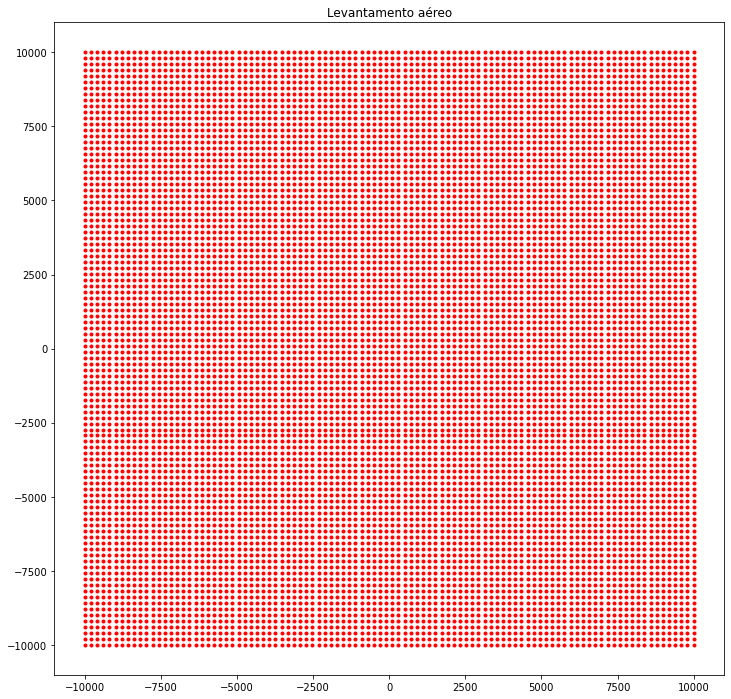

In [3]:
coodX, coodY, coodZ = sample_random.sample_random_coordinated(**cood_bounds)

incl, decl, mag = sample_random.sample_random_mag(**mag_bounds)

x, y, X, Y, Z = plot_3D.create_aquisicao(**acquisition)

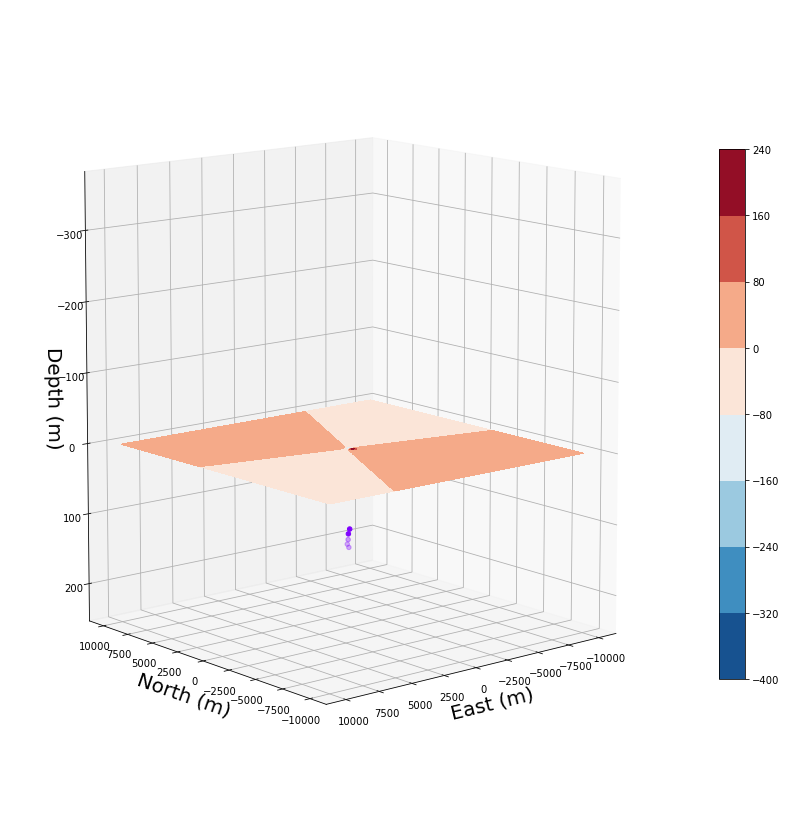

In [4]:
balls_mag = {'incl': incl,
               'decl': decl,
               'mag': mag,
               'n': 5,
               'Xref': X,
               'Yref': Y,
               'Zref': Z,
               'I': 30.0,
               'D': 50.0,
               'coodX': coodX,
               'coodY': coodY,
               'coodZ': coodZ,
               'raio': 100.0}

I = 30.0
D = 50.0

tfa_n_bolinhas = sample_random.tfa_n_dots(**balls_mag)


plot_3D.modelo_anomalia_3D(Y, X, tfa_n_bolinhas, coodY, coodX, coodZ, mag)

In [5]:
def create_population_v1(xmax, xmin, ymax, ymin, zlim, z_min, inclmax, inclmin, declmax, declmin, magmax, magmin, n_dip, n_pop, homogeneo):
    """
    Função com o objetivo de criar uma população com n indivíduos randômicos, que estaram de acordo com os parâmetros
    escolhidos.

    :param xmax: O valor máximo da coordenada X.
    :param ymax: O valor máximo da coordenada Y.
    :param zlim: O valor máximo da coordenada Z.
    :param xmin: O valor minímo da coordenada X.
    :param ymin: O valor minímo da coordenada Y.
    :param z_min: O valor minímo da coordenada Z.
    :param n_pop: O número de indivíduos desejados na população.
    :param n_dip: O número de dipolos desejados para cada indivíduo.
    :param inclmax: Valor máximo da inclianção magnética.
    :param inclmin: Valor mínimo da inclianção magnética.
    :param declmax: Valor máximo da inclianção magnética.
    :param declmin: Valor mínimo da declianção magnética.
    :param magmax: Valor máximo da magnetização.
    :param magmin: Valor mínimo da magnetização.
    :param homogeneo: True para valores de inclinação, declinação e magnetização iguais para as n dipolos.
                      False é a opção default, onde os valores de inclinação, declinação e magnetização é criada de
                      forma randômica.

    :return pop: Lista com n indivíduos/dipolos criados de forma randômica.
    """
    pop = []
    n_par = 6
    for j in range(n_pop):
        individuo = np.zeros((n_dip, n_par))
        coodX, coodY, coodZ = sample_random.sample_random_coordinated(xmax, xmin, ymax, ymin, zlim, z_min, n_dip)
        incl, decl, mag = sample_random.sample_random_mag(inclmax, inclmin, declmax, declmin, magmax, magmin, n_dip, homogeneo)
        for i in range(n_dip):
            individuo[i][0], individuo[i][1], individuo[i][2], individuo[i][3], individuo[i][4], individuo[i][5] = coodX[i], coodY[i], coodZ[i], incl[i], decl[i], mag[i]
        pop.append(individuo)
    
    return pop


In [6]:
population = {'xmax': 10000.0,
                'xmin': -10000.0,
                'ymax': 10000.0,
                'ymin': -10000.0,
                'zlim': 150.0,
                'z_min': 0.0,
                'n_dip': 5,
                'n_pop': 2,
                'inclmax': -80.0,
                'inclmin': 15.0,
                'declmax': 172.0,
                'declmin': -15.0,
                'magmax': 5.0,
                'magmin': 0.5,
                'homogeneo': True
                }

In [7]:
pop = create_population_v1(**population)

In [8]:
test = pop[0]
print(test)
print(test[0][1])
print(len(test))
print(len(test[0]))
anomaly = aux_operators.caculation_onlyone_anomaly(X, Y, Z, I, D, test)
print(anomaly)

[[ 7.23963717e+03 -7.78224288e+03  2.70992886e+01 -7.86714597e+01
   6.80064278e+01  4.09462393e+00]
 [-7.78162523e+03 -4.79401220e+03  1.27769227e+02 -7.86714597e+01
   6.80064278e+01  4.09462393e+00]
 [ 1.76251110e+03  2.52890712e+03  1.43880592e+02 -7.86714597e+01
   6.80064278e+01  4.09462393e+00]
 [-7.97832558e+03  5.41176574e+03  4.41984368e+00 -7.86714597e+01
   6.80064278e+01  4.09462393e+00]
 [ 1.41485623e+03 -5.01077810e+03  1.21412456e+02 -7.86714597e+01
   6.80064278e+01  4.09462393e+00]]
-7782.242880201431
5
6
[[0.00817346 0.00844463 0.00869357 ... 0.0179305  0.01555677 0.01357933]
 [0.00889871 0.00921856 0.00951358 ... 0.0199888  0.01723634 0.01496358]
 [0.00971498 0.0100946  0.01044673 ... 0.02240207 0.01919216 0.01656387]
 ...
 [0.00902648 0.00989608 0.01082022 ... 0.00205735 0.00198667 0.00191892]
 [0.00823012 0.00897108 0.00975187 ... 0.00199645 0.00192954 0.00186529]
 [0.00752    0.00815397 0.00881701 ... 0.00193715 0.00187383 0.00181292]]


In [9]:
pop

[array([[ 7.23963717e+03, -7.78224288e+03,  2.70992886e+01,
         -7.86714597e+01,  6.80064278e+01,  4.09462393e+00],
        [-7.78162523e+03, -4.79401220e+03,  1.27769227e+02,
         -7.86714597e+01,  6.80064278e+01,  4.09462393e+00],
        [ 1.76251110e+03,  2.52890712e+03,  1.43880592e+02,
         -7.86714597e+01,  6.80064278e+01,  4.09462393e+00],
        [-7.97832558e+03,  5.41176574e+03,  4.41984368e+00,
         -7.86714597e+01,  6.80064278e+01,  4.09462393e+00],
        [ 1.41485623e+03, -5.01077810e+03,  1.21412456e+02,
         -7.86714597e+01,  6.80064278e+01,  4.09462393e+00]]),
 array([[-9.55530680e+03, -9.84645505e+03,  3.33419242e+01,
         -8.52948527e+00,  1.05108643e+02,  1.12599903e+00],
        [ 5.87943665e+03,  7.24582613e+03,  7.29664190e+01,
         -8.52948527e+00,  1.05108643e+02,  1.12599903e+00],
        [ 1.09963681e+01, -9.69201802e+03,  1.31475261e+02,
         -8.52948527e+00,  1.05108643e+02,  1.12599903e+00],
        [-1.78066840e+03,  5.4

In [10]:
pop1 = pop.copy()

In [11]:
pop1[1][:,5] = 5.0

In [12]:
print(pop1)

[array([[ 7.23963717e+03, -7.78224288e+03,  2.70992886e+01,
        -7.86714597e+01,  6.80064278e+01,  4.09462393e+00],
       [-7.78162523e+03, -4.79401220e+03,  1.27769227e+02,
        -7.86714597e+01,  6.80064278e+01,  4.09462393e+00],
       [ 1.76251110e+03,  2.52890712e+03,  1.43880592e+02,
        -7.86714597e+01,  6.80064278e+01,  4.09462393e+00],
       [-7.97832558e+03,  5.41176574e+03,  4.41984368e+00,
        -7.86714597e+01,  6.80064278e+01,  4.09462393e+00],
       [ 1.41485623e+03, -5.01077810e+03,  1.21412456e+02,
        -7.86714597e+01,  6.80064278e+01,  4.09462393e+00]]), array([[-9.55530680e+03, -9.84645505e+03,  3.33419242e+01,
        -8.52948527e+00,  1.05108643e+02,  5.00000000e+00],
       [ 5.87943665e+03,  7.24582613e+03,  7.29664190e+01,
        -8.52948527e+00,  1.05108643e+02,  5.00000000e+00],
       [ 1.09963681e+01, -9.69201802e+03,  1.31475261e+02,
        -8.52948527e+00,  1.05108643e+02,  5.00000000e+00],
       [-1.78066840e+03,  5.48507448e+03,  9.